# Análisis Exploratorio de Datos (EDA)
# Proyecto: Predicción de Ventas

**Autor:** Javier Gacitúa  
**Fecha:** Octubre 2025

---

## Objetivos del Análisis

1. Comprender la estructura y calidad de los datos
2. Identificar patrones y tendencias en las ventas
3. Detectar outliers y valores faltantes
4. Analizar correlaciones entre variables
5. Generar insights para Feature Engineering

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Librerías importadas correctamente")


Librerías importadas correctamente


## 1. Carga de Datos


In [4]:
# Importar módulo de carga de datos
import sys
sys.path.append('../src')
from data_loader import DataLoader

# Inicializar cargador con el dataset real de Kaggle
loader = DataLoader(base_path='../data')

# Cargar dataset desde archivo local
print("Cargando dataset desde archivo local...")
df = loader.load_from_local('train.csv')

if df is not None:
    print(f"\nDataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
    loader.get_dataset_info(df)
else:
    print("Error: No se pudo cargar el dataset")
    print("Verifica que el archivo train.csv esté en data/raw/")


Cargando dataset desde archivo local...
Dataset loaded from local: 9,800 rows, 18 columns

Dataset cargado: 9800 filas, 18 columnas

SALES FORECASTING DATASET - INFORMATION

Dimensions: 9,800 rows x 18 columns

Available columns:
    1. Row ID               [int64] - 0 nulls
    2. Order ID             [object] - 0 nulls
    3. Order Date           [object] - 0 nulls
    4. Ship Date            [object] - 0 nulls
    5. Ship Mode            [object] - 0 nulls
    6. Customer ID          [object] - 0 nulls
    7. Customer Name        [object] - 0 nulls
    8. Segment              [object] - 0 nulls
    9. Country              [object] - 0 nulls
   10. City                 [object] - 0 nulls
   11. State                [object] - 0 nulls
   12. Postal Code          [float64] - 11 nulls
   13. Region               [object] - 0 nulls
   14. Product ID           [object] - 0 nulls
   15. Category             [object] - 0 nulls
   16. Sub-Category         [object] - 0 nulls
   17. Product Na

In [5]:
# Preparar dataset para análisis
# Convertir fechas y renombrar columnas para facilitar análisis
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

# Crear columnas auxiliares para análisis temporal
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['DayOfWeek'] = df['Order Date'].dt.dayofweek
df['Quarter'] = df['Order Date'].dt.quarter

# Renombrar Sales a minúsculas para consistencia con el código
df = df.rename(columns={'Sales': 'sales', 'Order Date': 'date'})

print("Columnas preparadas para análisis:")
print(df.columns.tolist())
print(f"\nRango de fechas: {df['date'].min()} a {df['date'].max()}")


Columnas preparadas para análisis:
['Row ID', 'Order ID', 'date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'sales', 'Year', 'Month', 'Day', 'DayOfWeek', 'Quarter']

Rango de fechas: 2015-01-03 00:00:00 a 2018-12-30 00:00:00


## 2. Información General del Dataset

In [6]:
# Información básica
print("=" * 70)
print(" INFORMACIÓN DEL DATASET")
print("=" * 70)
print(f"\nDimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas\n")
print(df.info())
print("\n" + "=" * 70)

 INFORMACIÓN DEL DATASET

Dimensiones: 9,800 filas x 23 columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   date           9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Catego

In [7]:
# Primeras filas
print("\n Primeras 10 filas del dataset:")
df.head(10)


 Primeras 10 filas del dataset:


,Row ID,Order ID,date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,sales,Year,Month,Day,DayOfWeek,Quarter
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,8,2,4
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,8,2,4
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,12,0,2
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,11,1,4
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,11,1,4
5,6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,2015,6,9,1,2
6,7,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,2015,6,9,1,2
7,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,2015,6,9,1,2
8,9,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,2015,6,9,1,2
9,10,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,2015,6,9,1,2


In [8]:
# Estadísticas descriptivas
print("\n Estadísticas Descriptivas:")
df.describe()


 Estadísticas Descriptivas:


,Row ID,date,Ship Date,Postal Code,sales,Year,Month,Day,DayOfWeek,Quarter
count,9800.000000,9800,9800,9789.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,55273.322403,230.769059,2016.724184,7.818469,15.486837,2.993673,2.885816
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000,2015.000000,1.000000,1.000000,0.000000,1.000000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,23223.000000,17.248000,2016.000000,5.000000,8.000000,1.000000,2.000000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,58103.000000,54.490000,2017.000000,9.000000,16.000000,3.000000,3.000000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.605000,2018.000000,11.000000,23.000000,5.000000,4.000000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000,2018.000000,12.000000,31.000000,6.000000,4.000000
std,2829.160653,NaN,NaN,32041.223413,626.651875,1.123984,3.281905,8.753733,2.180441,1.057449


## 3. Análisis de Valores Faltantes

In [9]:
# Detectar valores faltantes
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Columna': missing.index,
    'Valores_Faltantes': missing.values,
    'Porcentaje': missing_pct.values
}).sort_values('Valores_Faltantes', ascending=False)

print("\n ANÁLISIS DE VALORES FALTANTES")
print("=" * 50)
print(missing_df[missing_df['Valores_Faltantes'] > 0])

if missing.sum() == 0:
    print("\n No hay valores faltantes en el dataset")
else:
    print(f"\n Total de valores faltantes: {missing.sum():,}")


 ANÁLISIS DE VALORES FALTANTES
        Columna  Valores_Faltantes  Porcentaje
11  Postal Code                 11    0.112245

 Total de valores faltantes: 11


## 4. Análisis de la Variable Objetivo (Ventas)

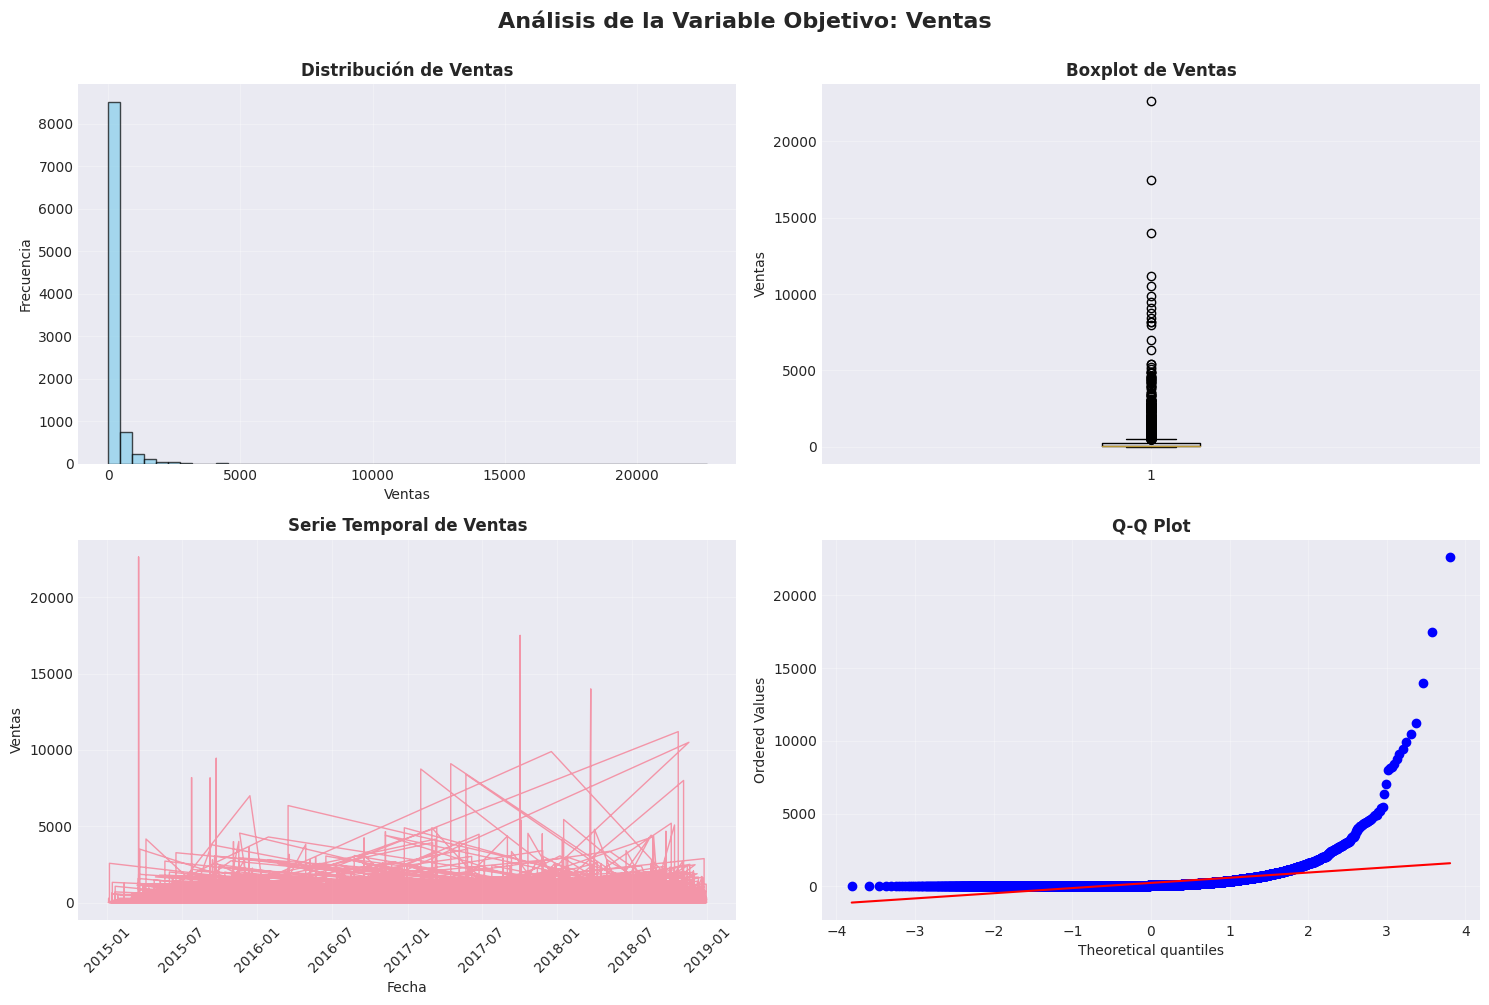


 ESTADÍSTICAS DE VENTAS
Media: $230.77
Mediana: $54.49
Desviación Estándar: $626.65
Mínimo: $0.44
Máximo: $22,638.48
Rango: $22,638.04
Coef. Variación: 271.55%


In [10]:
# Distribución de ventas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma
axes[0, 0].hist(df['sales'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Ventas')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de Ventas', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Boxplot
axes[0, 1].boxplot(df['sales'], vert=True)
axes[0, 1].set_ylabel('Ventas')
axes[0, 1].set_title('Boxplot de Ventas', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Serie temporal
axes[1, 0].plot(df['date'], df['sales'], linewidth=1, alpha=0.7)
axes[1, 0].set_xlabel('Fecha')
axes[1, 0].set_ylabel('Ventas')
axes[1, 0].set_title('Serie Temporal de Ventas', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# QQ-plot para normalidad
from scipy import stats
stats.probplot(df['sales'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Análisis de la Variable Objetivo: Ventas', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Estadísticas clave
print("\n ESTADÍSTICAS DE VENTAS")
print("=" * 40)
print(f"Media: ${df['sales'].mean():,.2f}")
print(f"Mediana: ${df['sales'].median():,.2f}")
print(f"Desviación Estándar: ${df['sales'].std():,.2f}")
print(f"Mínimo: ${df['sales'].min():,.2f}")
print(f"Máximo: ${df['sales'].max():,.2f}")
print(f"Rango: ${df['sales'].max() - df['sales'].min():,.2f}")
print(f"Coef. Variación: {(df['sales'].std() / df['sales'].mean()) * 100:.2f}%")

## 5. Matriz de Correlación

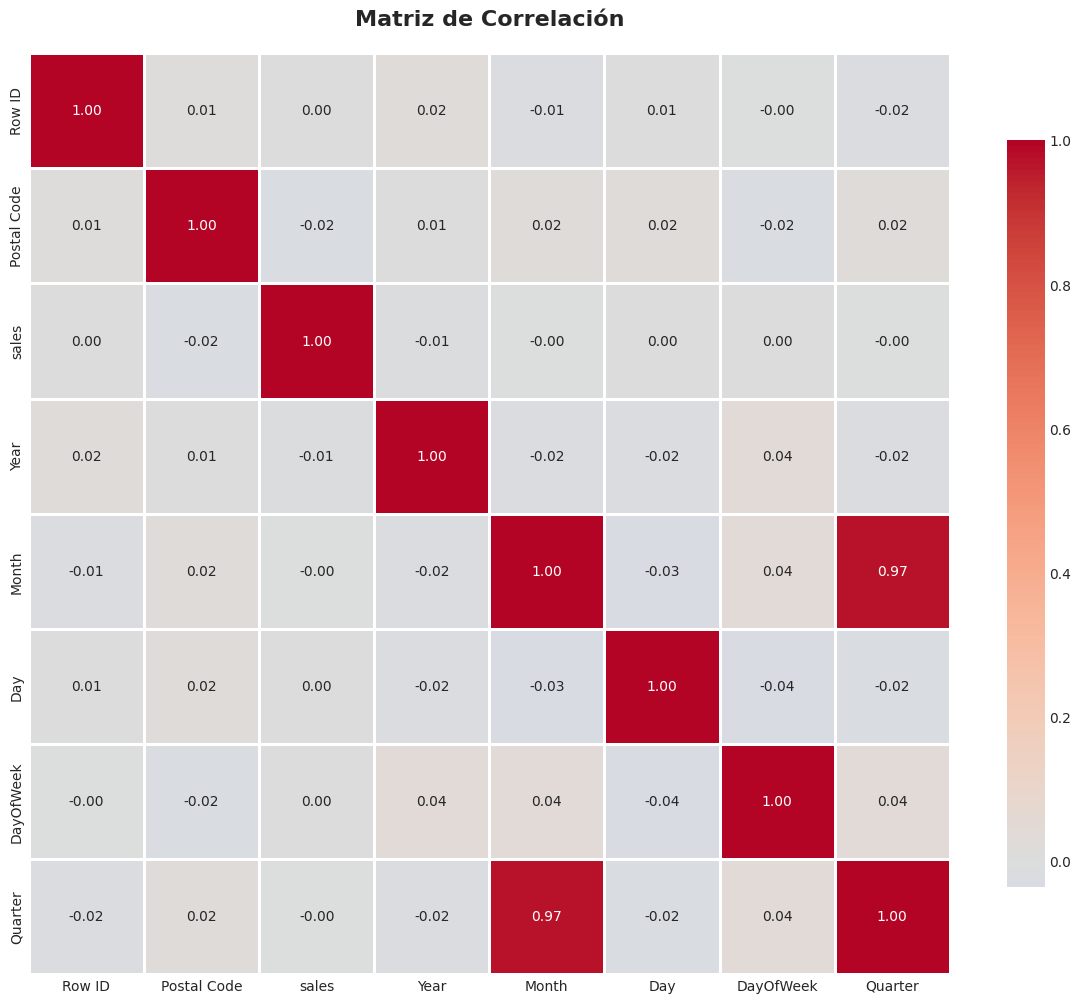


 CORRELACIÓN CON VENTAS
sales          1.000000
Day            0.003301
DayOfWeek      0.001575
Row ID         0.001151
Month         -0.000134
Quarter       -0.001434
Year          -0.010624
Postal Code   -0.024067
Name: sales, dtype: float64


In [11]:
# Calcular correlación
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
           center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlación con ventas
print("\n CORRELACIÓN CON VENTAS")
print("=" * 40)
sales_corr = corr_matrix['sales'].sort_values(ascending=False)
print(sales_corr)

## 6. Análisis por Categorías

In [12]:
# Ventas por categoría de producto
if 'product_category' in df.columns:
    category_sales = df.groupby('product_category')['sales'].agg(['sum', 'mean', 'count']).sort_values('sum', ascending=False)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Gráfico de barras
    category_sales['sum'].plot(kind='bar', ax=axes[0], color='steelblue')
    axes[0].set_title('Ventas Totales por Categoría', fontweight='bold', fontsize=14)
    axes[0].set_xlabel('Categoría')
    axes[0].set_ylabel('Ventas Totales')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Gráfico circular
    axes[1].pie(category_sales['sum'], labels=category_sales.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Distribución de Ventas por Categoría', fontweight='bold', fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    print("\n VENTAS POR CATEGORÍA")
    print("=" * 60)
    print(category_sales)

## 7. Análisis Temporal

In [13]:
# Análisis por día de la semana
if 'day_of_week' in df.columns:
    day_names = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
    dow_sales = df.groupby('day_of_week')['sales'].mean().sort_index()
    
    plt.figure(figsize=(12, 6))
    plt.bar(range(7), dow_sales.values, color='coral', edgecolor='black')
    plt.xticks(range(7), day_names, rotation=45)
    plt.xlabel('Día de la Semana')
    plt.ylabel('Ventas Promedio')
    plt.title('Ventas Promedio por Día de la Semana', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    print("\n VENTAS POR DÍA DE LA SEMANA")
    print("=" * 40)
    for idx, day in enumerate(day_names):
        print(f"{day}: ${dow_sales.iloc[idx]:,.2f}")

## 8. Detección de Outliers

In [14]:
# Método IQR para detectar outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers, lower, upper = detect_outliers_iqr(df, 'sales')

print("\n DETECCIÓN DE OUTLIERS (Método IQR)")
print("=" * 50)
print(f"Límite inferior: ${lower:,.2f}")
print(f"Límite superior: ${upper:,.2f}")
print(f"Outliers detectados: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

if len(outliers) > 0:
    print("\n Estadísticas de outliers:")
    print(outliers['sales'].describe())


 DETECCIÓN DE OUTLIERS (Método IQR)
Límite inferior: $-272.79
Límite superior: $500.64
Outliers detectados: 1145 (11.68%)

 Estadísticas de outliers:
count     1145.000000
mean      1270.546212
std       1427.896223
min        501.810000
25%        636.860000
50%        871.400000
75%       1348.704000
max      22638.480000
Name: sales, dtype: float64


## 9. Insights y Conclusiones

###  Hallazgos Principales:

1. **Distribución de Ventas:**
   - La variable objetivo muestra [describir distribución]
   - Presencia de [describir outliers si los hay]

2. **Correlaciones:**
   - Las variables más correlacionadas con ventas son: [listar]
   - Variables a considerar para feature engineering: [listar]

3. **Patrones Temporales:**
   - [Describir tendencias temporales]
   - [Describir estacionalidad si existe]

4. **Categorías:**
   - [Describir comportamiento por categorías]

###  Próximos Pasos:

-  Limpieza de datos completada
-  Feature Engineering (siguiente notebook)
-  Modelado predictivo
-  Evaluación y optimización

---

**Nota:** Este análisis debe actualizarse con tu dataset real.

In [15]:
# Guardar dataset para siguiente etapa
# df.to_csv('../data/processed/sales_explored.csv', index=False)
print("Análisis exploratorio completado")


Análisis exploratorio completado
